In [1]:
!python -m pip install -e ..

Obtaining file:///Users/asmazzeo/Documents/UTN/Proyecto%20FInal/Frontier-Exploration-with-a-prior
  Attempting uninstall: FrontierExploration
    Found existing installation: FrontierExploration 1.0.0
    Uninstalling FrontierExploration-1.0.0:
      Successfully uninstalled FrontierExploration-1.0.0
  Running setup.py develop for FrontierExploration
You should consider upgrading via the '/Users/asmazzeo/Documents/UTN/Proyecto FInal/Frontier-Exploration-with-a-prior/frontier_exploration_with_a_prior/bin/python -m pip install --upgrade pip' command.


In [2]:
import os
import pickle
from matplotlib import pyplot as plt

base_dir = os.getcwd()
# file_dir = f"{base_dir}/files/planta_murguiondo_grid.pkl"
file_dir = f"{base_dir}/files/small_house_grid.pkl"


with open(file_dir, "rb") as file:
    grid = pickle.load(file)

70it [00:00, 89.64it/s]                                                                                                 


The robot should take 38 steps to explore the grid.


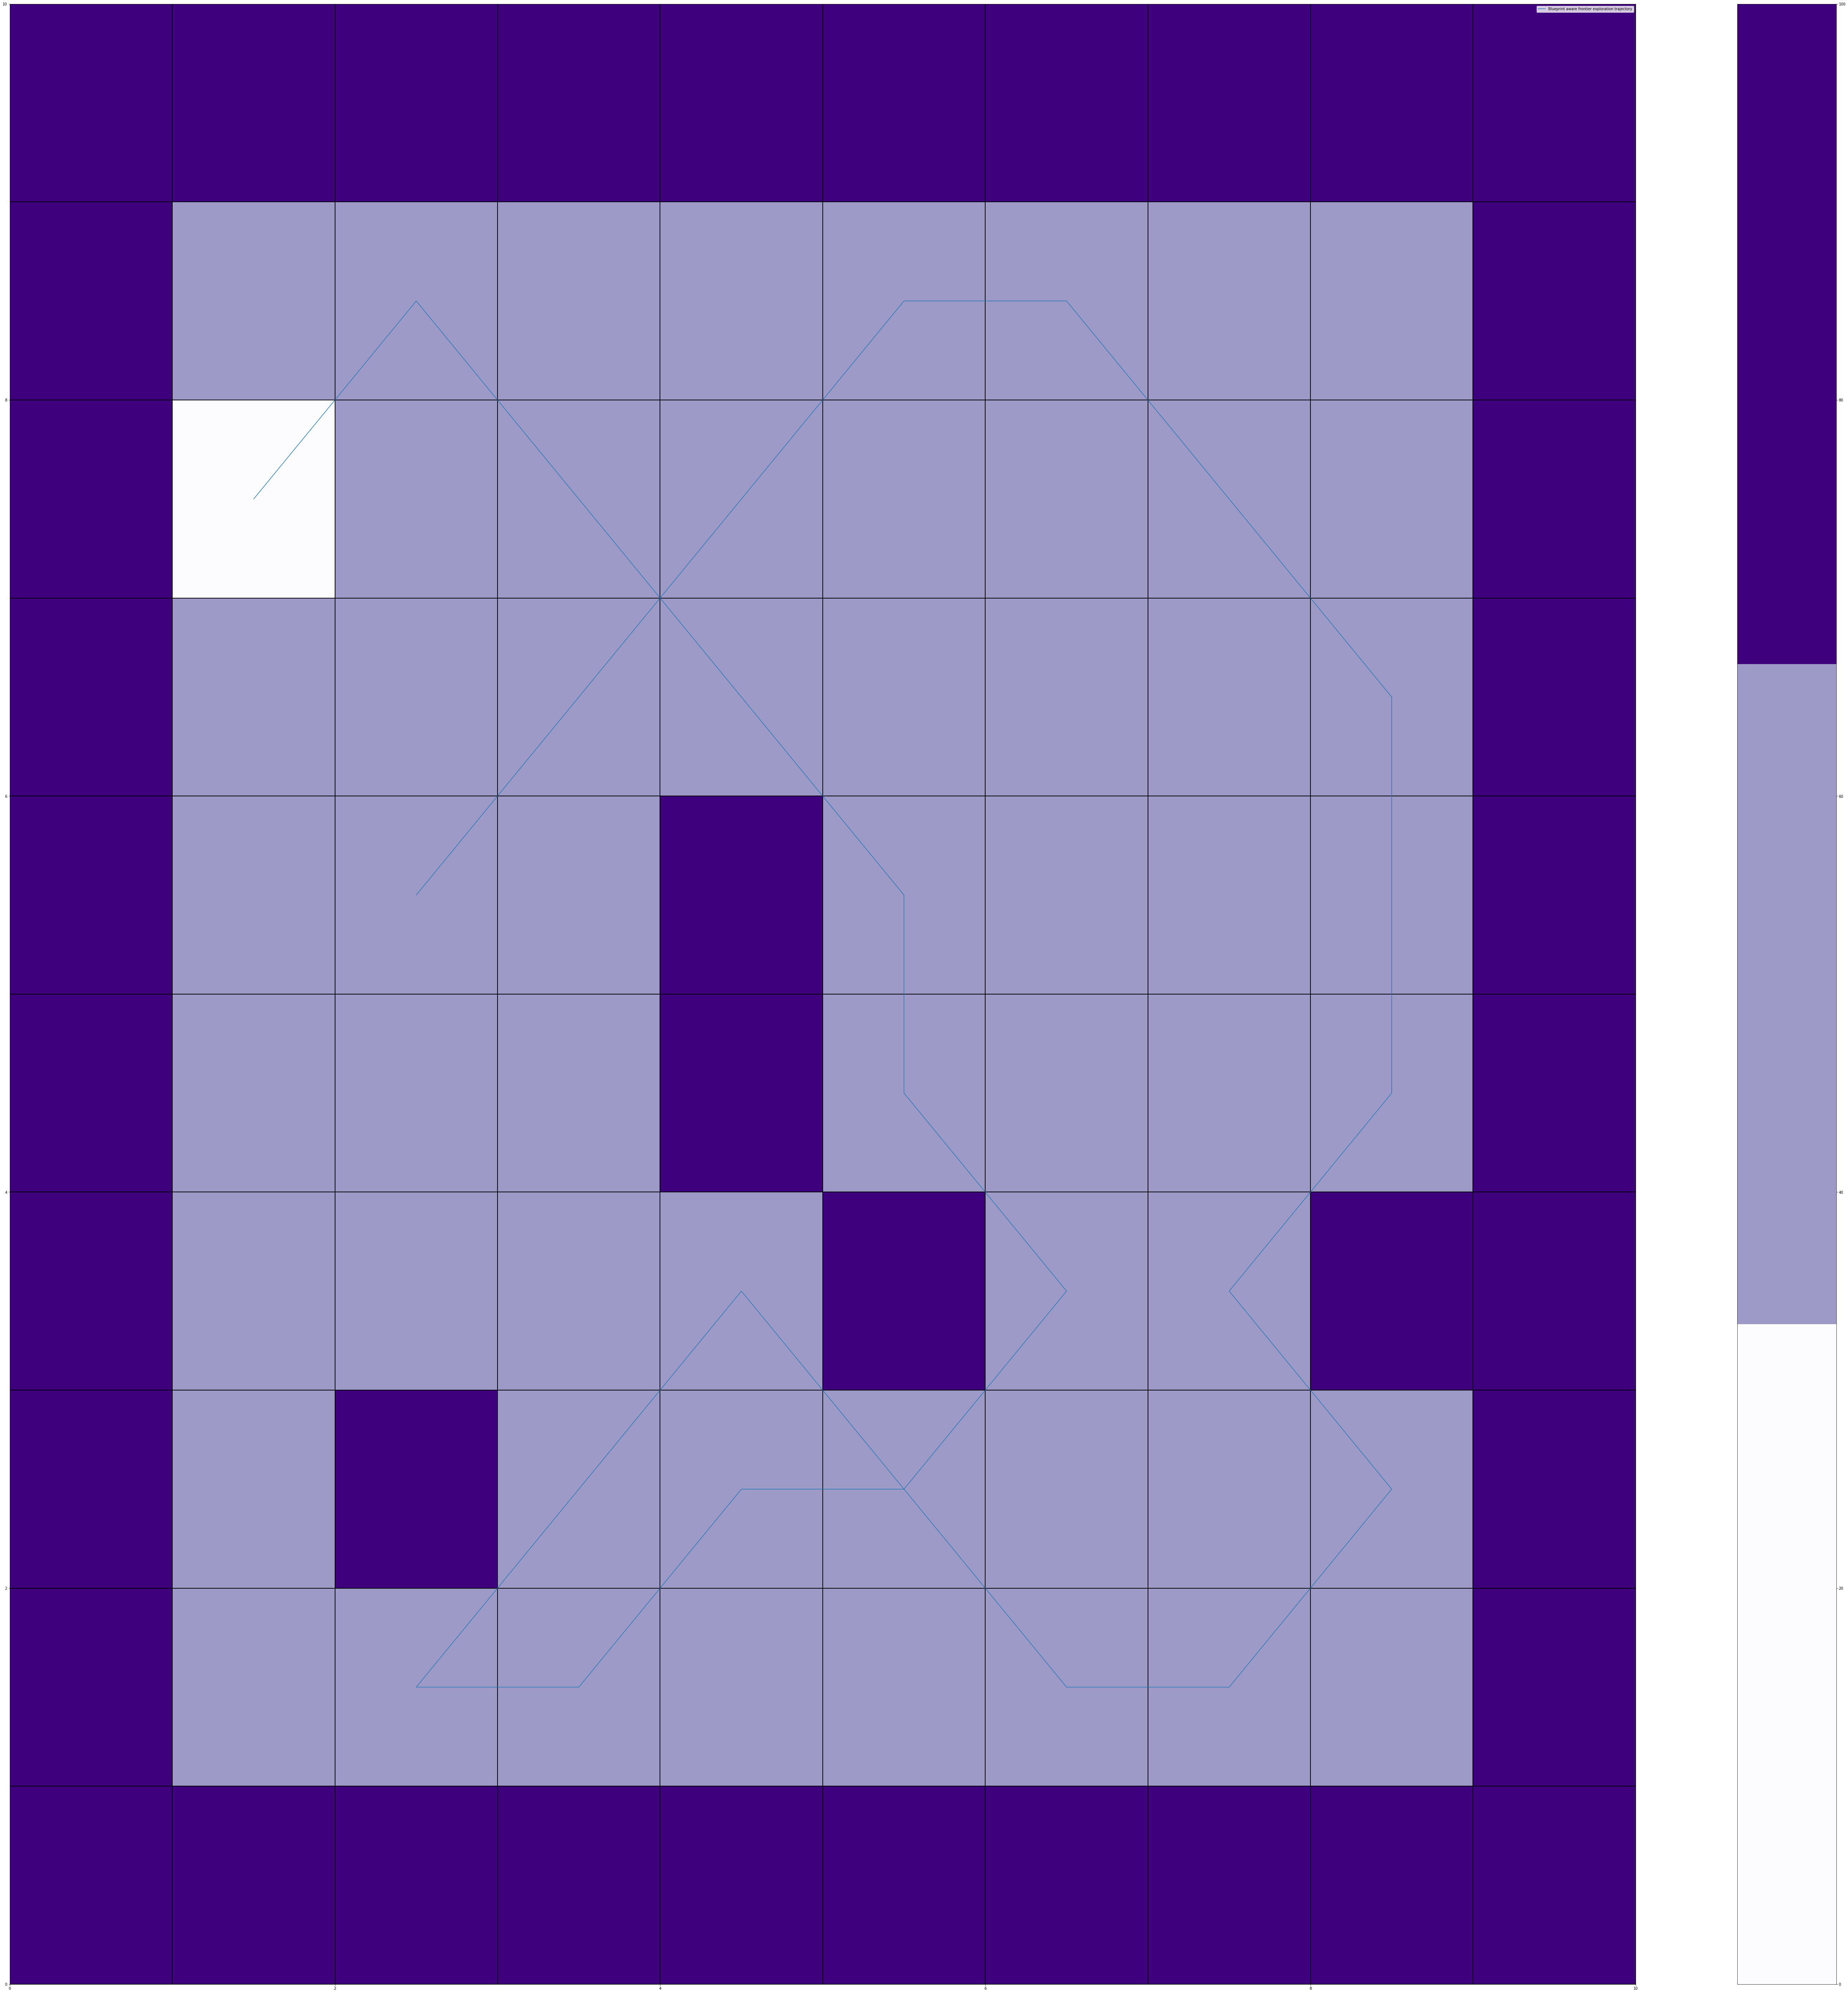

In [3]:
import numpy as np
from FrontierExploration.preprocessing.grid.mock_grid import create_mock_grid
from FrontierExploration.preprocessing.trajectory.not_naive_approach import BlueprintAwareFrontierExploration

grid = create_mock_grid(num_x_cells=10, num_y_cells=10,
                        cell_size=0.1, occupancy_percentage=10)
p = BlueprintAwareFrontierExploration(grid=grid, start_cell=(2, 5))
path = p.solve()

fig = p.plot(figsize=(100,100))
ax = fig.gca()
to_plot = np.asarray(path).T
to_plot = np.add(to_plot, np.ones_like(to_plot) * 0.5)
ax.plot(to_plot[0], to_plot[1],
        label="Blueprint aware frontier exploration trajectory")
plt.legend(loc='best')
print(f"The robot should take {len(path)} steps to explore the grid.")

plt.show()